In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.model_selection import train_test_split
p = sns.load_dataset("penguins")
p.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [2]:
p_train, p_test = train_test_split(p, test_size=0.3, random_state=42, stratify=p['species'])
print(p_train.shape, p_test.shape)

(240, 7) (104, 7)


In [3]:
from sklearn.impute import SimpleImputer

features= ['bill_length_mm', 'bill_depth_mm']
imputer = SimpleImputer(strategy='mean')
p_train_imputed = imputer.fit_transform(p_train[features])
dt_classification = DecisionTreeClassifier(max_depth=1)
dt_classification.fit(p_train_imputed, p_train['species'])


DecisionTreeClassifier(max_depth=1)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# create an instance of SimpleImputer to replace missing values
imputer = SimpleImputer()

# replace missing values in the p_train and p_test dataframes
p_train_imputed = imputer.fit_transform(p_train[features])
p_test_imputed = imputer.transform(p_test[features])

# create a new instance of DecisionTreeClassifier with the same hyperparameters
dt_classification_imputed = DecisionTreeClassifier(random_state=1, max_depth=6)

# fit the model on the imputed training data
dt_classification_imputed.fit(p_train_imputed, p_train.species)

# get the predictions on the imputed training and test sets
predictionsOnTrainset = dt_classification_imputed.predict(p_train_imputed)
predictionsOnTestset = dt_classification_imputed.predict(p_test_imputed)

# calculate the accuracy scores on the imputed training and test sets
accuracyTrain = accuracy_score(predictionsOnTrainset, p_train.species)
accuracyTest = accuracy_score(predictionsOnTestset, p_test.species)

# print the accuracy scores on the imputed training and test sets
print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))


Accuracy on training set 0.9958333333333333
Accuracy on test set 0.9230769230769231


The accuracy is different on the training and the test set. This is expected because of the split between the table rows where 30% goes to the test set, and 70% for the training. Testing set has new rows that the training set does not have, so it can be slightley more difficult for the tests to pass. Accuracy should always be lower than the training set.

In [5]:
from sklearn import tree
import graphviz

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

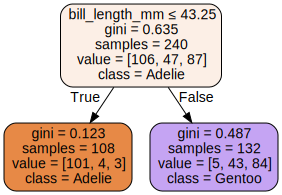

In [6]:
plot_tree_classification(dt_classification, features, np.sort(p.species.unique()))

I think i understand it. 1 box could be seen as a if statement. In the top box the first statements asks if the bill_length_mm equals or shorter than 43.25. If true... it goes to the left box on the second row. If false it goes to the right. in the boxes of the next row that could also be another if statement, or it can be a result like in this example, because it does'nt go any further down with more if statements.
